0.572934681318


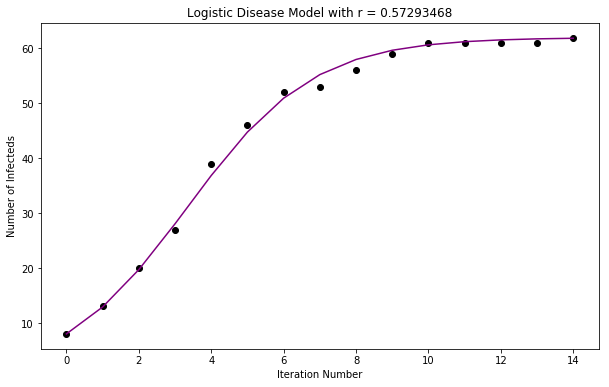

In [2]:
#Author:  Ryan Florida
#Purpose: Use gradient descent (greedy local search) algorithm so as to
#         minimize sum of squares error for the M&M Disease modeling project.
from random import random, seed
from numpy import sum, exp
import matplotlib.pyplot as plt

#This will standardize all figure sizes.
plt.rcParams["figure.figsize"] = [10,6]

#0: Main.
def main():
    #Define Step size, keep this pretty small.
    step    = 1e-5
    #Tolerance.
    epsilon = 1e-10
    #Populate iteration vector.
    x       = [i for i in range(15)]
    #Recorded (experimental) values on each iteration.
    y       = [8, 13, 20, 27, 39, 46, 52, 53, 56, 59, 61, 61, 61, 61, 62]
    #Carrying capacity.
    K       = 62
    #Initial population.
    p0      = y[0]
    #List to hold potential r-values.
    r_vals  = []
    #Define logistic function, sum of squares, and derivative of sum of
    #squares.
    Logistic = lambda r, t: K*p0/(p0 + (K-p0)*exp(-r*t))
    f        = lambda r: sum([(Logistic(r, t) - y[t])**2 for t in x])
    df       = lambda r: sum([2*(Logistic(r, t) - y[t])*K*p0*t*(K-p0)*exp(-r*t)/\
            (p0 + (K - p0)*exp(-r*t))**2 for t in x])
    #Perform gradient descent algorithm 20 times, each time starting at a
    #unique random point.
    for i in range(20):
        seed(i)
        r        = random()
        prev     = f(r)
        gradient = df(r)
        r        -= step*gradient
        while(f(r) - prev > epsilon):
            prev     = f(r)
            gradient = df(r)
            r -= step*gradient
        r_vals += [r]
    #Out of all the local minima, choose the one that minimizes the sum of
    #squares.
    r = Minimum(r_vals, f, x)
    print(r)
    #Plot
    Plot(r, Logistic, x, y)

#1: Loacate value in vec that minimizes fxn.
def Minimum(vec, fxn, x):
    r = vec[0]
    for v in vec[1:]:
        for t in x:
            if fxn(v) < fxn(r):
                r = v
    return r

#2: Plot the input function.
def Plot(r, fxn, x, y):
    plt.scatter(x, y, c='k')
    plt.plot(x, [fxn(r, t) for t in x], c='purple')
    plt.title('Logistic Disease Model with r = %0.8f' %r)
    plt.xlabel('Iteration Number')
    plt.ylabel('Number of Infecteds')
    plt.show()

#Call main.
main()
